<a href="https://colab.research.google.com/github/wweavishay/weather_streamlit/blob/main/weatherapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import requests
import json
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

API_KEY = "cc684ce23b3296f9598c4187825107eb"


In [192]:
# json file

# load json setting
def load_settings():
    try:
        with open('settings.json', 'r') as f:
            return json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        return {'timezone': 'UTC'}  # Default timezone is UTC

# save json setting
def save_settings(settings):
    with open('settings.json', 'w') as f:
        json.dump(settings, f)



In [ ]:
# functions the send data to json file

def set_default_location():
    city_name = input("Enter your default city name: ")
    country_name = input("Enter the country (optional, press Enter to skip): ")
    settings = load_settings()
    settings['default_location'] = {'city': city_name, 'country': country_name}
    save_settings(settings)
    print("Default location set successfully.")


def set_temperature_unit():
    unit = input("Enter your preferred temperature unit (Celsius or Fahrenheit): ").lower()
    if unit in ['celsius', 'fahrenheit']:
        settings = load_settings()
        settings['temperature_unit'] = unit
        save_settings(settings)
        print("Temperature unit preference set successfully.")
    else:
        print("Invalid temperature unit. Please enter either Celsius or Fahrenheit.")

In [193]:
def get_weather(city_name, country_name=None):
    if country_name:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_name}&appid={API_KEY}&units=metric"
    else:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}&units=metric"

    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error: Failed to retrieve weather data.")
        return None

    data = response.json()

    if data["cod"] == "404":
        print("Error: city not found.")
        return None

    return data


In [194]:
def display_weather(city_name, country_name=None):
    city_name = city_name.lower()
    country_name = country_name.lower() if country_name else None
    weather_data = get_weather(city_name, country_name)

    if weather_data:
        temperature = weather_data["main"]["temp"]
        weather_conditions = weather_data["weather"][0]["description"]
        humidity = weather_data["main"]["humidity"]

        user_settings = load_settings()
        user_timezone = pytz.timezone(user_settings.get('timezone', 'UTC'))
        user_time = datetime.now(user_timezone)
        formatted_user_time = user_time.strftime("%d / %m / %Y - %H:%M")

        city_timezone_offset = weather_data["timezone"]
        city_timezone = pytz.FixedOffset(city_timezone_offset // 60)
        city_time = user_time.astimezone(city_timezone)
        formatted_city_time = city_time.strftime("%d / %m / %Y - %H:%M")

        print(f"Weather in {city_name}:")
        if user_settings.get('temperature_unit', 'celsius').lower() == 'celsius':
            print(f"Temperature: {temperature}°C")
        else:
            temperature_f = (temperature * 9 / 5) + 32
            print(f"Temperature: {temperature_f}°F")
        print(f"Weather Conditions: {weather_conditions}")
        print(f"Humidity: {humidity}%")
        print(f"Local Date and Time (User's Timezone): {formatted_user_time}")
        print(f"Local Date and Time ({city_name}): {formatted_city_time}")
        print("")

        # Display weather image based on conditions
        if temperature < 10:
            image_url = "https://cdn-icons-png.flaticon.com/128/2469/2469994.png"  # Cold icon
        elif 10 <= temperature < 20:
            image_url = "https://cdn-icons-png.flaticon.com/128/1163/1163624.png"  # Moderate icon
        else:
            image_url = "https://cdn-icons-png.flaticon.com/128/9231/9231728.png"  # Warm icon

        response = requests.get(image_url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print("Error: Could not fetch weather image.")


Welcome to the Weather App!
Write the number of the function to choose one: (for example number 3 to display weather )
1. Set Default Location
2. Set Temperature Unit
3. Display Weather
Enter your choice: 3
Default location not set. Please set default location first.
------------------------------------------------------------------------------
Write the number of the function to choose one: (for example number 3 to display weather )
1. Set Default Location
2. Set Temperature Unit
3. Display Weather
Enter your choice: 1
Enter your default city name: london
Enter the country (optional, press Enter to skip): 
Default location set successfully.
------------------------------------------------------------------------------
Write the number of the function to choose one: (for example number 3 to display weather )
1. Set Default Location
2. Set Temperature Unit
3. Display Weather
Enter your choice: 3
Weather in london:
Temperature: 13.09°C
Weather Conditions: overcast clouds
Humidity: 80%
Lo

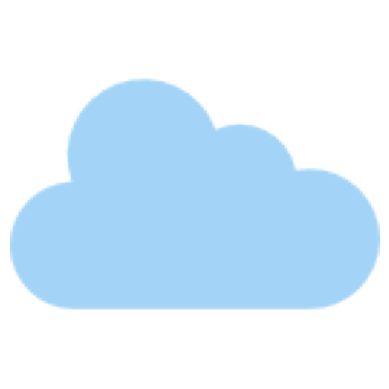

------------------------------------------------------------------------------
Write the number of the function to choose one: (for example number 3 to display weather )
1. Set Default Location
2. Set Temperature Unit
3. Display Weather


In [ ]:
def main():
    print("Welcome to the Weather App!")

    while True:
      print("Write the number of the function to choose one: (for example number 3 to display weather )")
      print("1. Set Default Location")
      print("2. Set Temperature Unit")
      print("3. Display Weather")
      choice = input("Enter your choice: ")


      if choice == '1':
          set_default_location()
      elif choice == '2':
          set_temperature_unit()
      elif choice == '3':
          settings = load_settings()
          default_location = settings.get('default_location')
          if default_location:
              display_weather(default_location['city'], default_location['country'])
          else:
              print("Default location not set. Please set default location first.")
      else:
          print("Invalid choice.")
      print("------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()
